In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 
from tabulate import tabulate               
import matplotlib as mat

In [2]:
data = pd.ExcelFile("UEFA Champions League 2016-2022 Data.xlsx")

In [3]:
data.sheet_names

['teams', 'stadiums', 'players', 'managers', 'matches', 'goals']

In [4]:
team = pd.read_excel(data,'teams')
stadium = pd.read_excel(data,'stadiums')
player = pd.read_excel(data,'players')
manager = pd.read_excel(data,'managers')
match = pd.read_excel(data,'matches')
goal = pd.read_excel(data,'goals')

In [5]:
team.head()

,TEAM_NAME,COUNTRY,HOME_STADIUM
0,AC Milan,Italy,Giuseppe Meazza
1,AFC Ajax,Netherlands,Johan Cruijff ArenA
2,Atalanta,Italy,Gewiss Stadium
3,Atlético Madrid,Spain,Wanda Metropolitano
4,Bayern München,Germany,Allianz Arena


In [6]:
stadium.head()

,NAME,CITY,COUNTRY,CAPACITY
0,Giuseppe Meazza,Milano,Italy,75923
1,Johan Cruijff ArenA,Amsterdam,Netherlands,54990
2,Gewiss Stadium,Bergamo,Italy,26562
3,Wanda Metropolitano,Madrid,Spain,68000
4,Allianz Arena,München,Germany,75024


In [7]:
player.head()

,PLAYER_ID,FIRST_NAME,LAST_NAME,NATIONALITY,DOB,TEAM,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FOOT
0,ply510,NaN,Danilo,Brazil,1991-07-15,Juventus,6.0,Defender,184.0,78.0,R
1,ply511,Mattia De,Sciglio,Italy,1992-10-20,Juventus,2.0,Defender,182.0,78.0,R
2,ply512,Federico,Gatti,Italy,1998-06-24,Juventus,15.0,Defender,190.0,84.0,R
3,ply513,Daniele,Rugani,Italy,1994-07-29,Juventus,24.0,Defender,190.0,84.0,R
4,ply514,Enzo,Barrenechea,Argentina,2001-05-22,Juventus,45.0,Midfielder,186.0,81.0,L


In [8]:
player.drop(["DOB","JERSEY_NUMBER"], axis = 1, inplace = True)

In [9]:
manager.head()

,FIRST_NAME,LAST_NAME,NATIONALITY,DOB,TEAM
0,Stefano,Pioli,Italy,1965-10-19,AC Milan
1,Alfred,Schreuder,Netherlands,1972-11-02,AFC Ajax
2,Gian Piero,Gasperini,Italy,1958-01-26,Atalanta
3,Diego,Simeone,Argentina,1970-04-28,Atlético Madrid
4,Julian,Nagelsmann,Germany,1987-07-23,Bayern München


In [10]:
match.head()

,MATCH_ID,SEASON,DATE_TIME,HOME_TEAM,AWAY_TEAM,STADIUM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,PENALTY_SHOOT_OUT,ATTENDANCE
0,mt1,2021-2022,15-SEP-21 08.00.00.000000000 PM,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062
1,mt2,2021-2022,15-SEP-21 08.00.00.000000000 PM,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546
2,mt3,2021-2022,28-SEP-21 08.00.00.000000000 PM,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0,37350
3,mt4,2021-2022,28-SEP-21 08.00.00.000000000 PM,RB Leipzig,Club Brugge KV,Red Bull Arena,1,2,0,23500
4,mt5,2021-2022,19-OCT-21 05.45.00.000000000 PM,Club Brugge KV,Manchester City,Jan Breydel Stadion,1,5,0,24915


In [11]:
match.drop(["DATE_TIME"],axis = 1)

,MATCH_ID,SEASON,HOME_TEAM,AWAY_TEAM,STADIUM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,PENALTY_SHOOT_OUT,ATTENDANCE
0,mt1,2021-2022,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062
1,mt2,2021-2022,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546
2,mt3,2021-2022,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0,37350
3,mt4,2021-2022,RB Leipzig,Club Brugge KV,Red Bull Arena,1,2,0,23500
4,mt5,2021-2022,Club Brugge KV,Manchester City,Jan Breydel Stadion,1,5,0,24915
...,...,...,...,...,...,...,...,...,...
739,mt740,2016-2017,Real Madrid,Atlético Madrid,Santiago Bernabéu,3,0,0,77609
740,mt741,2016-2017,AS Monaco,Juventus,Stade Louis II,0,2,0,16762
741,mt742,2016-2017,Juventus,AS Monaco,Allianz Stadium,2,1,0,40244
742,mt743,2016-2017,Atlético Madrid,Real Madrid,Vicente Calderón,2,1,0,53422


In [12]:
goal.head()

,GOAL_ID,MATCH_ID,PID,DURATION,ASSIST,GOAL_DESC
0,gl470,mt154,ply1479,4,ply864,right-footed shot
1,gl471,mt154,ply1075,28,ply864,penalty
2,gl472,mt154,ply585,69,ply864,right-footed shot
3,gl473,mt155,ply396,12,ply653,right-footed shot
4,gl474,mt155,ply1064,81,ply653,right-footed shot


In [13]:
def lower(data):
    data.columns = data.columns.str.lower()
    return data

In [14]:
goal = lower(goal)
match = lower(match)
stadium = lower(stadium)
player = lower(player)
manager = lower(manager)
team = lower(team)

In [47]:
team_stad = team.merge(stadium, left_on = 'home_stadium', right_on = 'name')
match = match.merge(stadium, left_on = 'stadium', right_on = 'name', how = 'left')
goals = goal.merge(match[['match_id', 'home_team', 
                  'away_team','season']]).merge(player[['player_id','position',
                                                        'foot', 'last_name']], 
                                                left_on = 'pid',
                                                right_on = 'player_id',
                                                how = 'left')

In [ ]:
winner = []
for home_club,away_club, goal_h, goal_a in zip(match['home_team'], match['away_team'],
                                     match['home_team_score'], match['away_team_score']):
    if goal_h > goal_a:
        winner.append(home_club)
    elif goal_h < goal_a:
        winner.append(away_club)
    else:
        winner.append('draw')

# Assigning winner column        
match['winner'] =winner 
#taking winners
winners = match['winner'].value_counts().reset_index()
winners.columns = ['winner', 'number_of_wins']
winners

In [92]:
print("Number of matches won by Manchester City = ",winners["number_of_wins"].values[3])
print("Number of matches won by Inter Milan = ",winners["number_of_wins"].values[22])

Number of matches won by Manchester City =  40
Number of matches won by Inter Milan =  9


# INTERPRETATION : Manchester City won the highest number of matches as per the Inter Milan.

In [106]:
#creating bins
goals['period_goals'] = pd.cut(goals['duration'], 
                               bins = [0,10,20,30,40,45,55,65,75,85,90,105,130], 
                               labels = ['minute_10','minute_20','minute_30','minute_40','minute_45',
                                         'minute_55','minute_65','minute_75','minute_85','minute_90', 
                                         'minute_115','miute_120' ])
#grouping by periods
scored_when = goals.groupby('period_goals')['goal_id'].count().reset_index()
scored_when.sort_values(by="goal_id",ascending=False)

,period_goals,goal_id
8,minute_85,293
6,minute_65,292
9,minute_90,272
7,minute_75,259
1,minute_20,258
3,minute_40,253
2,minute_30,247
5,minute_55,243
0,minute_10,213
4,minute_45,179


# INTERPRETATION : Majority of the goals were scored in the second half of the game(45-90)

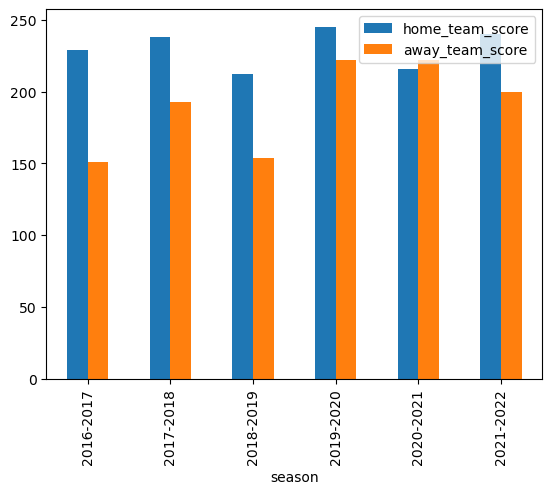

In [111]:
#grouping by season and plotting 
group = match.groupby('season')[['home_team_score',
                         'away_team_score']].sum()
group.plot(kind="bar")
plt.show()

# INTERPRETATION : Almost in every season home clubs scored more goals then away clubs except for the year 2020-2021.

In [127]:
goal = goals['position'].value_counts()
goal

Forward       1633
Midfielder     585
Defender       299
Goalkeeper       5
Name: position, dtype: int64

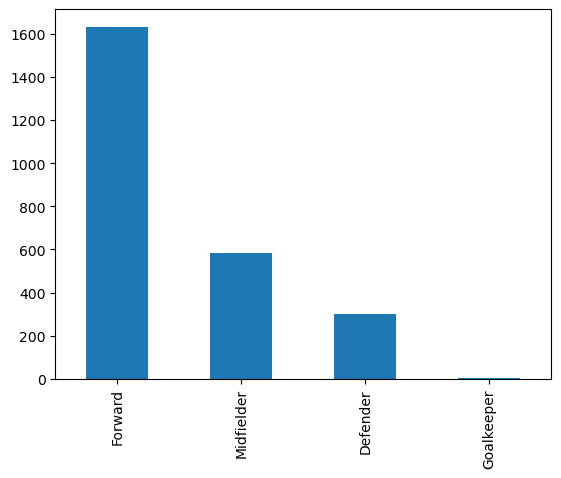

In [128]:
goal.plot.bar();

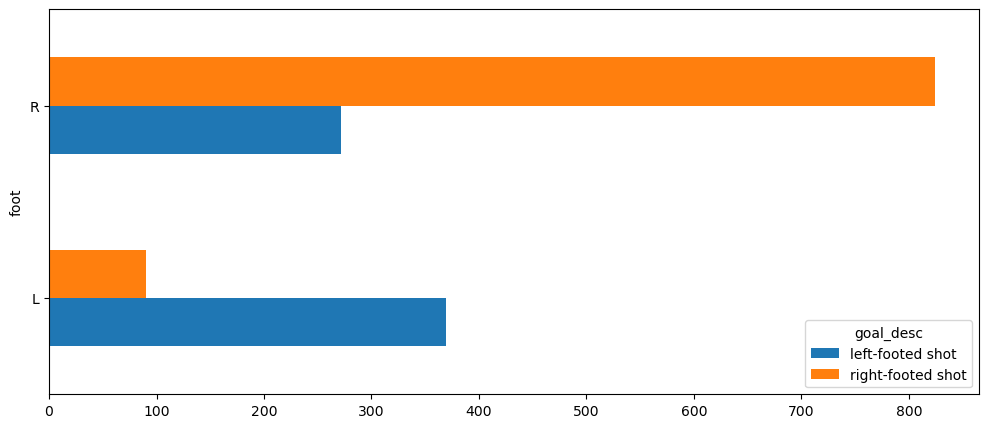

In [131]:
#grouping by foot
foot_goal = pd.pivot_table(goals, index = 'foot', columns = 'goal_desc',
                           values = 'pid', aggfunc = 'count').fillna(0)
# taking only foot goals 
foot_goal = foot_goal[['left-footed shot', 'right-footed shot']]  
foot_goal.plot(kind= 'barh', figsize = (12,5))
plt.show()

In [137]:
best_scorers = goals['last_name'].value_counts()[:20].reset_index().rename({'index':'player', 'last_name':'goals'}, axis = 1)
best_scorers

,player,goals
0,Lewandowski,60
1,Ronaldo,47
2,Messi,42
3,Benzema,40
4,Haaland,38
5,Salah,36
6,Mbappé,33
7,Silva,28
8,Forsberg,27
9,Mané,24


# FINAL INTERPRETATION : Best team to choose would be Manchester City , as its overall performance is better than the Inter as you can see from the above analysis. Also, the players who scored the more is from the Manchester City only.Therefore, the best team to pic for the champions league finale would be Manchester City.

